In [20]:
import pandas as pd

In [24]:
from google.colab import files
uploaded = files.upload()
import io


Saving BankChurners.csv to BankChurners.csv


In [25]:
import io
df = pd.read_csv(io.BytesIO(uploaded['BankChurners.csv']))


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [34]:
print(df.describe)

<bound method NDFrame.describe of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Inco

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
print(df['Attrition_Flag'].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


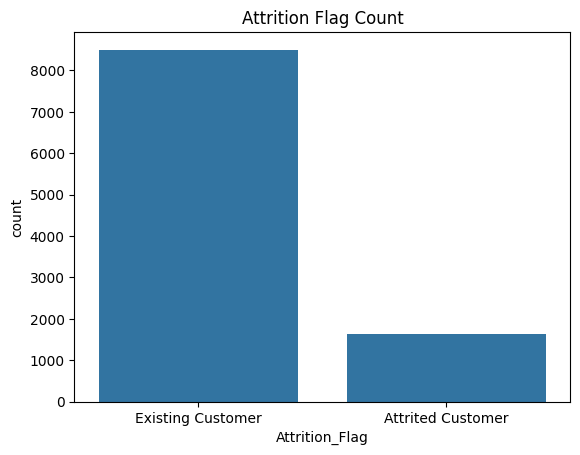

In [37]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Attrition Flag Count')
plt.show()

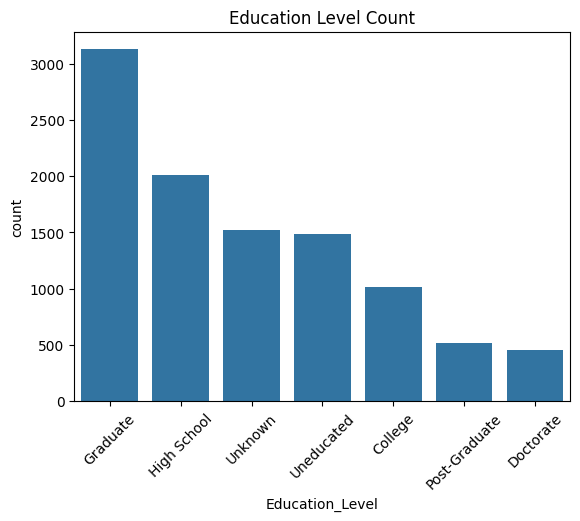

In [38]:
sns.countplot(x='Education_Level', data=df, order=df['Education_Level'].value_counts().index)
plt.title('Education Level Count')
plt.xticks(rotation=45)
plt.show()

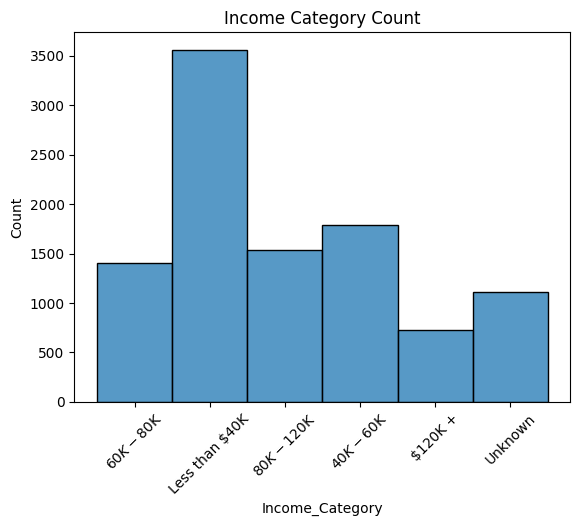

In [39]:
sns.histplot(x='Income_Category', data=df, bins=10)
plt.title('Income Category Count')
plt.xticks(rotation=45)
plt.show()

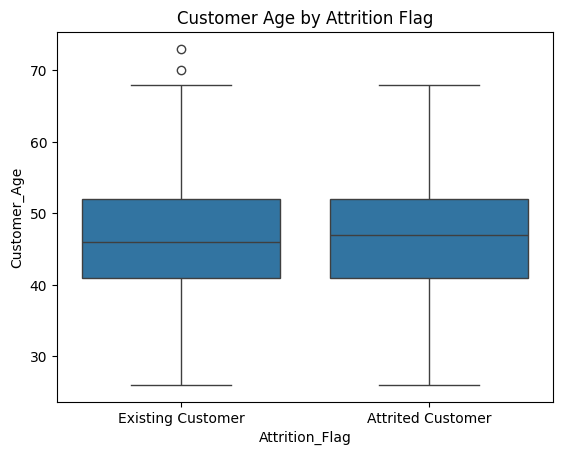

In [40]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)
plt.title('Customer Age by Attrition Flag')
plt.show()

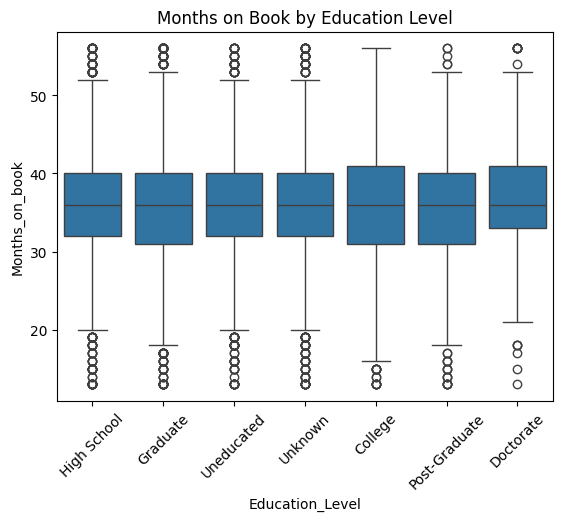

In [41]:
sns.boxplot(x='Education_Level', y='Months_on_book', data=df)
plt.title('Months on Book by Education Level')
plt.xticks(rotation=45)
plt.show()

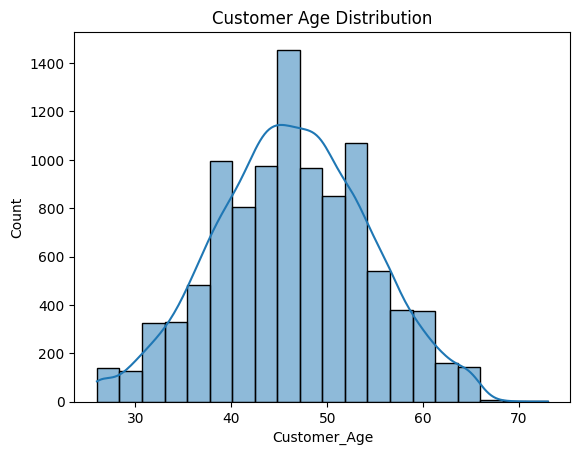

In [42]:
sns.histplot(x='Customer_Age', data=df, bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.show()

In [43]:
# Install pandas module
!pip install pandas

# Import required modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load data from CSV file
path = '/content/drive/MyDrive/Predicting Credit Card/BankChurners.csv'
df = pd.read_csv(path)

# Separate features and target variable
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Numeric transformer (for scaling numeric features)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical transformer (for one-hot encoding categorical features)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Preprocessor (to apply transformations based on feature types)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the classifier
classifier = DecisionTreeClassifier()

# Create the pipeline (preprocessor + classifier)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 0.9249753208292202


In [44]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}
Test accuracy: 0.9333662388943732


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])

# Separate features and target variable
X = df.drop(columns=['Attrition_Flag'])  # Features
y = df['Attrition_Flag']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (rest of the code remains the same)


In [48]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:" , mae)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Mean Squared Error: 0.06910167818361303
Mean Absolute Error: 0.06910167818361303
Confusion Matrix:
 [[ 255   72]
 [  68 1631]]
Accuracy: 0.930898321816387
Precision: 0.9577216676453317
Recall: 0.9599764567392584
F1 Score: 0.9588477366255144
